In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

C:\Users\marve\AppData\Local\Temp\ipykernel_27424\473654446.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.datasets import make_circles

In [3]:
X,y=make_circles(100,factor=.1, noise=.1) #100 data points

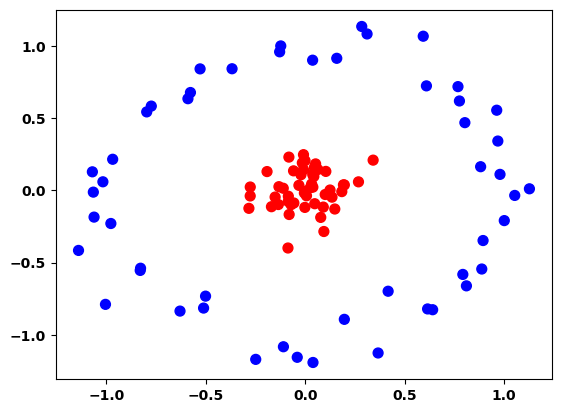

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [6]:
X_train

array([[-8.51068723e-03,  1.43061660e-01],
       [-1.51026641e-01, -4.64844397e-02],
       [ 5.25624300e-02,  1.83088919e-01],
       [ 8.88036659e-01, -5.44537803e-01],
       [ 3.86291656e-02,  1.15147831e-01],
       [-2.10661374e-02,  1.08202702e-01],
       [-1.39099839e-03, -1.18019891e-01],
       [-1.06986295e+00,  1.28251926e-01],
       [-5.83132867e-02,  1.35053838e-01],
       [-2.76065031e-01,  2.30736767e-02],
       [-8.50597531e-02, -7.69609656e-02],
       [-5.00790670e-01, -7.32341149e-01],
       [ 5.93670226e-01,  1.06690759e+00],
       [ 8.82322702e-01,  1.63630656e-01],
       [-8.27582060e-01, -5.39119568e-01],
       [-1.34820622e-01, -9.81546881e-02],
       [-9.67759410e-01,  2.15131473e-01],
       [ 3.24778436e-02,  4.36761266e-02],
       [-1.01695262e+00,  5.91696340e-02],
       [-1.06134022e+00, -1.85232310e-01],
       [-1.09275998e-01, -1.08255451e+00],
       [ 9.63207391e-01,  5.54718428e-01],
       [-6.29227117e-01, -8.35742908e-01],
       [-2.

In [7]:
classifier=SVC(kernel="linear")

In [8]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [9]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4

In [14]:
print(y_pred) # this is predicted value
print(y_test) #this is actual value

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1]


In [15]:
classifier2 = SVC(kernel="rbf")

In [16]:
classifier2.fit(X_train,y_train)

SVC()

In [17]:
y_pred2 = classifier2.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred2)

1.0

In [19]:
print(y_test) # this is my actual value

print(y_pred2) # this is my second [predicted value]

[0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1]
[0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1]


In [20]:
#see values are exact correct, thats why accuracy 1.0, that is 100

In [26]:
classifier3 = SVC(kernel="poly")

In [27]:
classifier3.fit(X_train,y_train)

SVC(kernel='poly')

In [28]:
y_pred3 = classifier3.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred3)

0.2

In [30]:
classifier4 = SVC(kernel = "poly",degree = 2)


In [31]:
classifier4.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

In [32]:
y_pred4 = classifier4.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred4)

1.0

In [34]:
#decision boundary aka decision rule or hyperplane

In [35]:
#decision boundry

zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\marve\AppData\Local\Temp\ipykernel_27424\3205361786.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


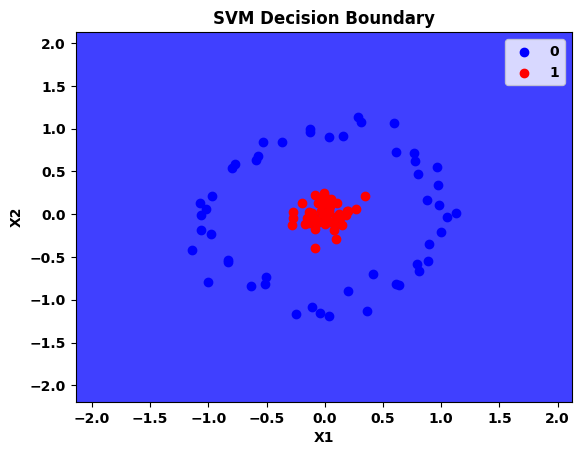

In [36]:
plot_decision_boundary(X,y,classifier)

C:\Users\marve\AppData\Local\Temp\ipykernel_27424\3205361786.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


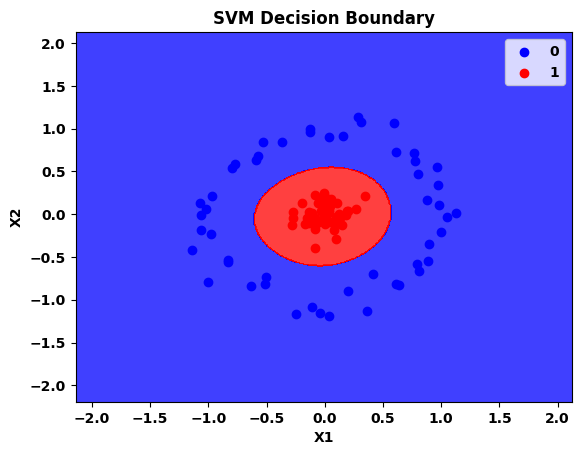

In [37]:
plot_decision_boundary(X,y,classifier2)

C:\Users\marve\AppData\Local\Temp\ipykernel_27424\3205361786.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


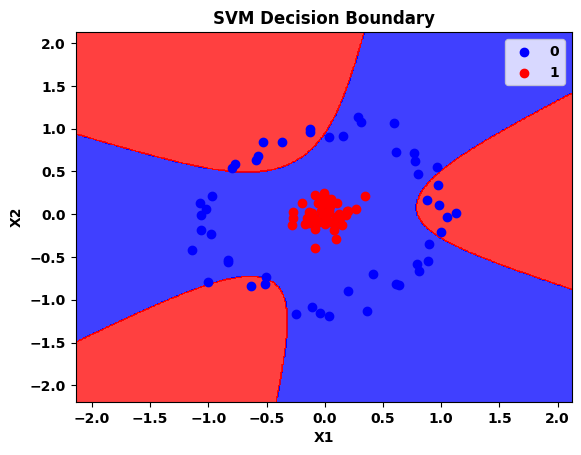

In [39]:
plot_decision_boundary(X,y,classifier3)

C:\Users\marve\AppData\Local\Temp\ipykernel_27424\3205361786.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


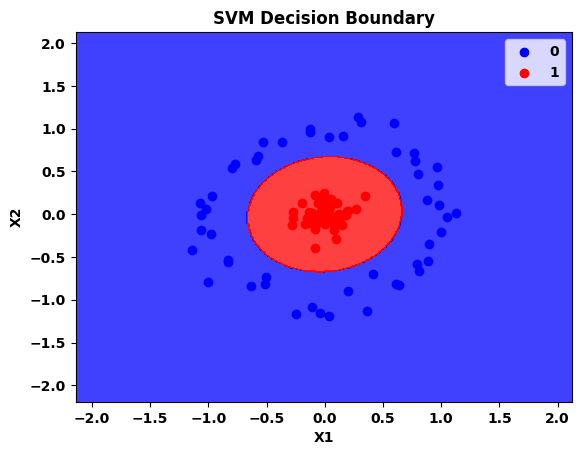

In [40]:
plot_decision_boundary(X,y,classifier4)

In [41]:
def plot_3d_plot(X,y):
    r=np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
    

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

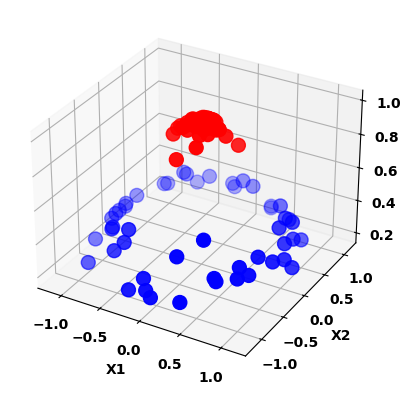

In [42]:
plot_3d_plot(X,y)